## This notebook will create the panels in Figure 2, showing root mean square error of the 1/f fit over 200 trials for BOSC, eBOSC and fBOSC

In [1]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
import pandas as pd
from scipy import stats
from matplotlib.pyplot import figure

In [2]:
# Set the Seaborn Style
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

In [3]:
# Load the data
df = pd.read_csv('error1f.csv')
df.head()

,nonlinear_theta,nonlinear_alpha,linear_theta,linear_alpha,condition
0,0.039655,0.103997,0.022123,0.019865,BOSC
1,0.023542,0.087884,0.014581,0.012323,BOSC
2,0.043565,0.107907,0.021036,0.023294,BOSC
3,0.042449,0.106791,0.010177,0.007919,BOSC
4,0.034267,0.098609,0.017571,0.015313,BOSC


/Users/rseymoue/miniconda3/envs/py35/lib/python3.5/site-packages/seaborn/categorical.py:2787: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/rseymoue/miniconda3/envs/py35/lib/python3.5/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


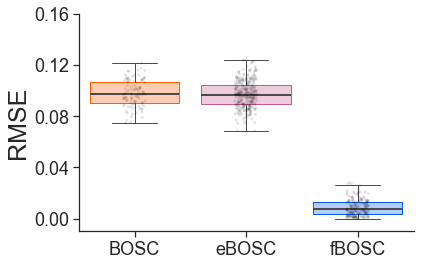

In [4]:
# Plot the Figure Using a Transparent Boxplot and Strip-plot showing individual data-points
ax = []
sns.set(rc = {'figure.figsize':(6,4)})
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

# Specify the colors
col = ['#ff5c04','#c8588e','#045cff']
    
ax = sns.boxplot(x="condition", y="nonlinear_alpha",
                 data=df, linewidth=1,showfliers = False,medianprops={"linewidth": 2,
                        "solid_capstyle": "butt"}, dodge=True)

# Iterrating over the boxes one-by-one
# Change the color manually
count = 0
for patch in ax.artists:
    # Set color manually
    patch.set_color(col[count])
    count=count+1


# adding transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))

# Strip-Plot
ax = sns.stripplot(x="condition", y="nonlinear_alpha",split=True,dodge=True,
                   palette=sns.color_palette(['black']),
                   alpha=0.1,size=3, data=df)

# Change various aspects of the graph to make it look nice
ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_ylabel("RMSE",fontsize=25,fontname="Arial")
ax.set_xlabel("",fontsize=25,fontname="Arial")
ax.set_ylim([-0.01, 0.16])
ax.yaxis.set_major_locator(plt.MaxNLocator(5))
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend([],[], frameon=False)

fig = ax.get_figure()
fig.show()
# fig.savefig('nonlinear_alpha.png', bbox_inches='tight',dpi=600)

/Users/rseymoue/miniconda3/envs/py35/lib/python3.5/site-packages/seaborn/categorical.py:2787: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/rseymoue/miniconda3/envs/py35/lib/python3.5/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


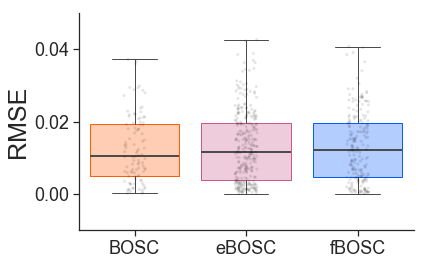

In [20]:
# Boxplot instead
ax = []
sns.set(rc = {'figure.figsize':(6,4)})
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

count = 0
col = ['#ff5c04','#c8588e','#045cff']

ax = sns.boxplot(x="condition", y="linear_theta",
                 data=df, linewidth=1,showfliers = False,medianprops={"linewidth": 2,
                        "solid_capstyle": "butt"}, dodge=True)

# Iterrating over the boxes one-by-one
# Change the color manually
count = 0
for patch in ax.artists:
    # Set color manually
    patch.set_color(col[count])
    count=count+1


# adding transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))
#     patch.set_linestyle([0, 0, 0])


ax = sns.stripplot(x="condition", y="linear_theta",split=True,dodge=True,
                   palette=sns.color_palette(['black']),
                   alpha=0.1,size=3, data=df)

    
ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_ylabel("RMSE",fontsize=25,fontname="Arial")
ax.set_xlabel("",fontsize=25,fontname="Arial")
ax.set_ylim([-0.01, 0.05])
ax.yaxis.set_major_locator(plt.MaxNLocator(4))
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.set_yscale("log")
plt.legend([],[], frameon=False)

fig = ax.get_figure()
fig.show()
fig.savefig('linear_theta.png', bbox_inches='tight',dpi=600)

/Users/rseymoue/miniconda3/envs/py35/lib/python3.5/site-packages/seaborn/categorical.py:2787: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/rseymoue/miniconda3/envs/py35/lib/python3.5/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


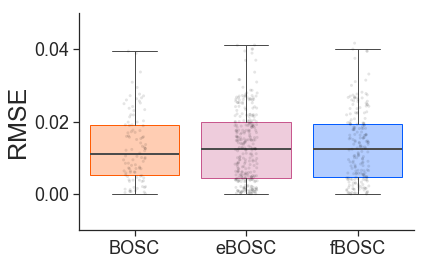

In [21]:
# Boxplot instead
ax = []
sns.set(rc = {'figure.figsize':(6,4)})
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

count = 0
col = ['#ff5c04','#c8588e','#045cff']

# Plot a transparent barchart
ax = sns.barplot(x="condition", y="linear_alpha",ci=None,
                 palette=sns.color_palette(['#057523','#a200ff']),
                    linewidth=2,alpha=0,edgecolor='white', data=df)
    
ax = sns.boxplot(x="condition", y="linear_alpha",
                 data=df, linewidth=1,showfliers = False,medianprops={"linewidth": 2,
                        "solid_capstyle": "butt"}, dodge=True)

# Iterrating over the boxes one-by-one
# Change the color manually
count = 0
for patch in ax.artists:
    # Set color manually
    patch.set_color(col[count])
    count=count+1


# adding transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))
#     patch.set_linestyle([0, 0, 0])


ax = sns.stripplot(x="condition", y="linear_alpha",split=True,dodge=True,
                   palette=sns.color_palette(['black']),
                   alpha=0.1,size=3, data=df)

    
ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_ylabel("RMSE",fontsize=25,fontname="Arial")
ax.set_xlabel("",fontsize=25,fontname="Arial")
ax.set_ylim([-0.01, 0.05])
ax.yaxis.set_major_locator(plt.MaxNLocator(4))
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.set_yscale("log")
plt.legend([],[], frameon=False)

fig = ax.get_figure()
fig.show()
fig.savefig('linear_alpha.png', bbox_inches='tight',dpi=600)

## Now let's plot the data for the special case where we simulate TWO oscillations

In [9]:
# Load the data
df = pd.read_csv('2osc_error1f.csv')
df.head()

,nonlinear_theta_alpha,linear_theta_alpha,condition
0,0.097753,0.003333,BOSC
1,0.081639,0.006730,BOSC
2,0.101662,0.016709,BOSC
3,0.100547,0.023941,BOSC
4,0.092364,0.012735,BOSC


/Users/rseymoue/miniconda3/envs/py35/lib/python3.5/site-packages/seaborn/categorical.py:2787: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/rseymoue/miniconda3/envs/py35/lib/python3.5/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


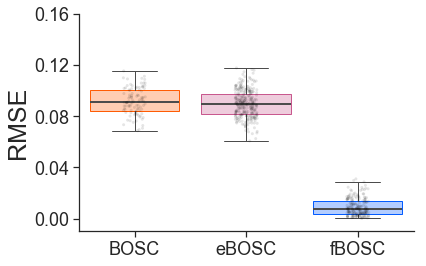

In [11]:
# Boxplot instead
ax = []
sns.set(rc = {'figure.figsize':(6,4)})
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

col = ['#ff5c04','#c8588e','#045cff']

ax = sns.boxplot(x="condition", y="nonlinear_theta_alpha",
                 data=df, linewidth=1,showfliers = False,medianprops={"linewidth": 2,
                        "solid_capstyle": "butt"}, dodge=True)

# Iterrating over the boxes one-by-one
# Change the color manually
count = 0
for patch in ax.artists:
    # Set color manually
    patch.set_color(col[count])
    count=count+1


# adding transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))
#     patch.set_linestyle([0, 0, 0])


ax = sns.stripplot(x="condition", y="nonlinear_theta_alpha",split=True,dodge=True,
                   palette=sns.color_palette(['black']),
                   alpha=0.1,size=3, data=df)

    
ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_ylabel("RMSE",fontsize=25,fontname="Arial")
ax.set_xlabel("",fontsize=25,fontname="Arial")
ax.set_ylim([-0.01, 0.16])
ax.yaxis.set_major_locator(plt.MaxNLocator(5))
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.set_yscale("log")
plt.legend([],[], frameon=False)

fig = ax.get_figure()
fig.show()
fig.savefig('nonlinear_theta_alpha.png', bbox_inches='tight',dpi=600)

/Users/rseymoue/miniconda3/envs/py35/lib/python3.5/site-packages/seaborn/categorical.py:2787: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/rseymoue/miniconda3/envs/py35/lib/python3.5/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


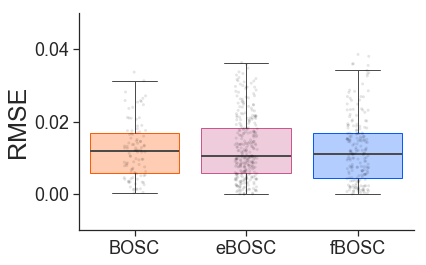

In [14]:
# Boxplot instead
ax = []
sns.set(rc = {'figure.figsize':(6,4)})
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

col = ['#ff5c04','#c8588e','#045cff']


ax = sns.boxplot(x="condition", y="linear_theta_alpha",
                 data=df, linewidth=1,showfliers = False,medianprops={"linewidth": 2,
                        "solid_capstyle": "butt"}, dodge=True)

# Iterrating over the boxes one-by-one
# Change the color manually
count = 0
for patch in ax.artists:
    # Set color manually
    patch.set_color(col[count])
    count=count+1


# adding transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))
#     patch.set_linestyle([0, 0, 0])


ax = sns.stripplot(x="condition", y="linear_theta_alpha",split=True,dodge=True,
                   palette=sns.color_palette(['black']),
                   alpha=0.1,size=3, data=df)

    
ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_ylabel("RMSE",fontsize=25,fontname="Arial")
ax.set_xlabel("",fontsize=25,fontname="Arial")
ax.set_ylim([-0.01, 0.05])
ax.yaxis.set_major_locator(plt.MaxNLocator(4))
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.set_yscale("log")
plt.legend([],[], frameon=False)

fig = ax.get_figure()
fig.show()
fig.savefig('linear_theta_alpha.png', bbox_inches='tight',dpi=600)